학번, 이름: 2021100019, 양은서

## 주제: YOLO와 CLIP을 활용한 텍스트 기반 객체 탐지

In [1]:
!pip install torch torchvision
!pip install opencv-python
!pip install numpy

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# YOLO 모델 파일 다운로드
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O coco.names

--2024-12-06 09:17:09--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  33.2MB/s    in 6.9s    

2024-12-06 09:17:17 (34.4 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2024-12-06 09:17:17--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/refs/heads/master/cfg/yolov3.cfg [following]
--2024-12-06 09:17:17--  https://github.com/pjreddie/darknet/raw/refs/heads/master/cfg/yolov3.cfg
Reusing existing connection to github.com:443.

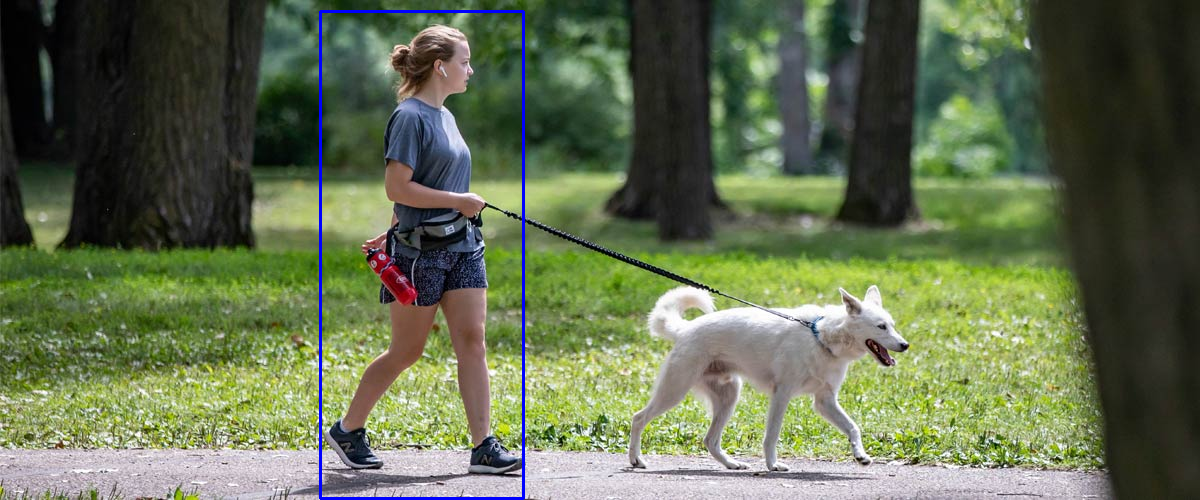

-1

In [22]:
from PIL import Image, ImageFile

from google.colab.patches import cv2_imshow

# COCO 클래스 이름 로드
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# YOLO 모델 로드
weights_path = "yolov3.weights"
cfg_path = "yolov3.cfg"
net = cv2.dnn.readNet(weights_path, cfg_path)

# 이미지 로드
ImageFile.LOAD_TRUNCATED_IMAGES = True

image = cv2.imread("dog_trail.jpg")  # 이미지 파일명 수정 가능
height, width = image.shape[:2]

# YOLO 입력 준비
blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
net.setInput(blob)

# YOLO 추론
layer_names = net.getUnconnectedOutLayersNames()
outputs = net.forward(layer_names)

# 사람(person) 클래스 필터링
person_boxes = []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.9 and classes[class_id] == "person":  # "person" 클래스만 선택
            center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype("int")
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            person_boxes.append([x, y, int(w), int(h)])

# 사람 영역 시각화
for (x, y, w, h) in person_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)

In [24]:
!pip show torch

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [26]:
# CLIP 라이브러리 설치
!pip install transformers
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-1kzpzl5j
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-1kzpzl5j
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.5 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=91ff0614def9b82ea3aa6d3249087ce32cc4533b0225d565f232a0daa2d14608
  Stored in directory: /tmp/pip-ephem-wheel-cache-x4todm3f/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
